In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set(font_scale=1.5)

In [2]:
#import os
#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

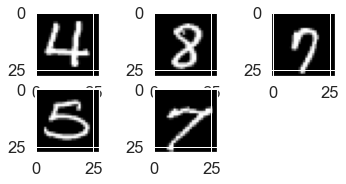

In [5]:
for i in range(331, 336):
    plt.subplot(i)
    random_num = np.random.randint(0,len(X_train))
    plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

In [6]:
#store in shape that keras needs: nrows, ncols, depth
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(28, 28, 1)

In [7]:
X_train.shape[0]

60000

In [8]:
#Reshape and Convert to either 0 or 1

num_samples = X_train.shape[0]

X_train = X_train.reshape(len(X_train), input_shape[0], input_shape[1], input_shape[2])
X_test = X_test.reshape(len(X_test), input_shape[0], input_shape[1], input_shape[2])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [9]:
# One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
num_classes = len(y_train[0])
num_classes

10

In [11]:
# Create Model
model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(.01),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [12]:
batch_size = 64
epochs = 15

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)

print('Test Loss:',score[0], 'Test Accuracy:', score[1])

Epoch 1/15
938/938 [==============================] - 161s 168ms/step - loss: 1.2398 - accuracy: 0.5973 - val_loss: 0.2447 - val_accuracy: 0.9291
Epoch 2/15
938/938 [==============================] - 154s 164ms/step - loss: 0.3759 - accuracy: 0.8855 - val_loss: 0.1761 - val_accuracy: 0.9482
Epoch 3/15
938/938 [==============================] - 154s 164ms/step - loss: 0.3045 - accuracy: 0.9080 - val_loss: 0.1547 - val_accuracy: 0.9542
Epoch 4/15
938/938 [==============================] - 154s 164ms/step - loss: 0.2655 - accuracy: 0.9205 - val_loss: 0.1365 - val_accuracy: 0.9598
Epoch 5/15
938/938 [==============================] - 151s 161ms/step - loss: 0.2376 - accuracy: 0.9281 - val_loss: 0.1175 - val_accuracy: 0.9643
Epoch 6/15
938/938 [==============================] - 144s 153ms/step - loss: 0.2043 - accuracy: 0.9386 - val_loss: 0.1069 - val_accuracy: 0.9679
Epoch 7/15
938/938 [==============================] - 151s 161ms/step - loss: 0.1855 - accuracy: 0.9447 - val_loss: 0.0993 -

KeyError: 'acc'

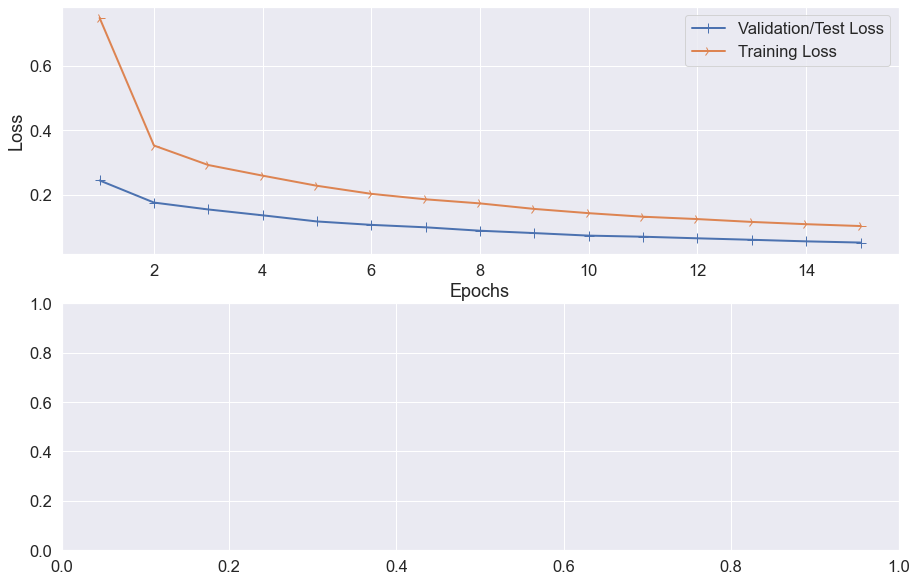

In [13]:
#Draw loss/accuracy charts over epochs
history_dict = history.history

plt.figure(figsize=(15,10))

plt.subplot(211)

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
   
epochs = range(1,len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, lw=2.0, marker='+', markersize=10.0)
plt.setp(line2, lw=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend();

plt.subplot(212)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, acc_values , label='Training Loss')
plt.setp(line1, lw=2.0, marker='+', markersize=10.0)
plt.setp(line2, lw=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend();

In [ ]:
model.save('Model\MNIST_cnn_15_epochs.h5')

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Model\model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
from PIL import Image
img = Image.open('Model\model_plot.png')
img